### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
plt.style.use('ggplot')

from datetime import datetime, date

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
df = pd.read_csv('../data/training.csv', parse_dates=['TransactionStartTime'])
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


### Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

In [4]:
df.shape

(95662, 16)

In [5]:
df.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64

In [6]:
print(df["FraudResult"].value_counts().to_frame())

             count
FraudResult       
0            95469
1              193


In [7]:
df.isnull().sum().sum()

np.int64(0)

In [8]:
df.set_index('TransactionId',inplace=True)
df.head()

,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
TransactionId,,,,,,,,,,,,,,,
TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [9]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [10]:
df.query('FraudResult == 1').value_counts(['Amount']).head(10)

Amount   
500000.0     50
5000000.0    13
100000.0      9
2000000.0     9
3000000.0     9
800000.0      8
700000.0      7
540000.0      6
900000.0      5
570035.0      4
Name: count, dtype: int64

### Extracting the date time info

In [11]:
#extracting the year as a new column
df['year'] = df['TransactionStartTime'].dt.year

In [12]:
#extracting the month as a new column
df['month'] = df['TransactionStartTime'].dt.month

In [13]:
#extracting the date as a new column
df['date'] = df['TransactionStartTime'].dt.strftime('%Y-%m-%d')

In [14]:
#extracting the starttime of the transaction 
df['TransactionStartTime_Time'] = df['TransactionStartTime'].dt.strftime('%H:%M:%S')

In [15]:
df['TransactionStartTime_Time'] = pd.to_datetime(df['TransactionStartTime_Time'], format='%H:%M:%S').dt.time

In [16]:
df["time_of_day"] = df["TransactionStartTime"].dt.second + df["TransactionStartTime"].dt.minute * 60 + df["TransactionStartTime"].dt.hour * 3600

In [17]:
df['day'] = df['TransactionStartTime'].dt.day
df['dayofweek'] = df['TransactionStartTime'].dt.dayofweek

In [18]:
#  2018-11-19 - monday --> classified as 0
#  2018-18-11 - sunday --> classified as 6
# 0 --> Monday
# 1 --> Tuesday
# 2 --> Wednesday
# 3 --> Thursday
# 4 --> Friday
# 5 --> Saturday
# 6 --> Sunday

In [19]:
# How many frauds were committed during each weekday?
df.groupby(['dayofweek', 'FraudResult'])['FraudResult'].count()

dayofweek  FraudResult
0          0              11808
           1                 29
1          0              15018
           1                 31
2          0              10203
           1                 29
3          0              11005
           1                 34
4          0              27686
           1                 30
5          0              10078
           1                 25
6          0               9671
           1                 15
Name: FraudResult, dtype: int64

In [20]:
print('CustomerID:', df.CustomerId.nunique(), 'AccountID:',df.AccountId.nunique(), 'SubscriptionID:', df.SubscriptionId.nunique())

CustomerID: 3742 AccountID: 3633 SubscriptionID: 3627


In [21]:
df.query('FraudResult == 1').value_counts(['CustomerId']).head(10)

CustomerId     
CustomerId_909     31
CustomerId_4878    22
CustomerId_1988    14
CustomerId_4453    12
CustomerId_2303     8
CustomerId_2266     7
CustomerId_3075     7
CustomerId_5054     7
CustomerId_5155     7
CustomerId_3768     6
Name: count, dtype: int64

In [ ]:
df.query('FraudResult == 1').value_counts(['AccountId']).head(10)
#looks similar, but one customer could have more than one Account

AccountId     
AccountId_572     31
AccountId_4421    22
AccountId_1609    14
AccountId_4003    12
AccountId_1909     8
AccountId_2656     7
AccountId_4687     7
AccountId_4590     7
AccountId_1873     7
AccountId_3337     6
Name: count, dtype: int64

In [ ]:
df.query('FraudResult == 1').value_counts(['SubscriptionId']).head(10)

SubscriptionId     
SubscriptionId_2950    31
SubscriptionId_4038    22
SubscriptionId_2872    14
SubscriptionId_3002    12
SubscriptionId_2496     8
SubscriptionId_2964     7
SubscriptionId_4160     7
SubscriptionId_2912     7
SubscriptionId_666      7
SubscriptionId_1252     6
Name: count, dtype: int64

In [51]:
df['BatchId'].value_counts().head(10)

BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_92882      6
Name: count, dtype: int64

In [52]:
df.query('FraudResult == 1').value_counts(['BatchId']).head(10)

BatchId       
BatchId_126656    4
BatchId_125211    2
BatchId_7585      2
BatchId_56782     2
BatchId_66926     2
BatchId_40160     2
BatchId_32834     2
BatchId_68081     2
BatchId_108820    1
BatchId_107825    1
Name: count, dtype: int64

## Dropping columns

In [24]:
cols = ['CurrencyCode', 'CountryCode']
df.drop(cols, axis = 1, inplace = True)

## Data insights using Plots

#### Product category

In [25]:
df.groupby(['ProductCategory', 'FraudResult'])['FraudResult'].count()

ProductCategory     FraudResult
airtime             0              45009
                    1                 18
data_bundles        0               1613
financial_services  0              45244
                    1                161
movies              0                175
other               0                  2
ticket              0                216
transport           0                 23
                    1                  2
tv                  0               1279
utility_bill        0               1908
                    1                 12
Name: FraudResult, dtype: int64

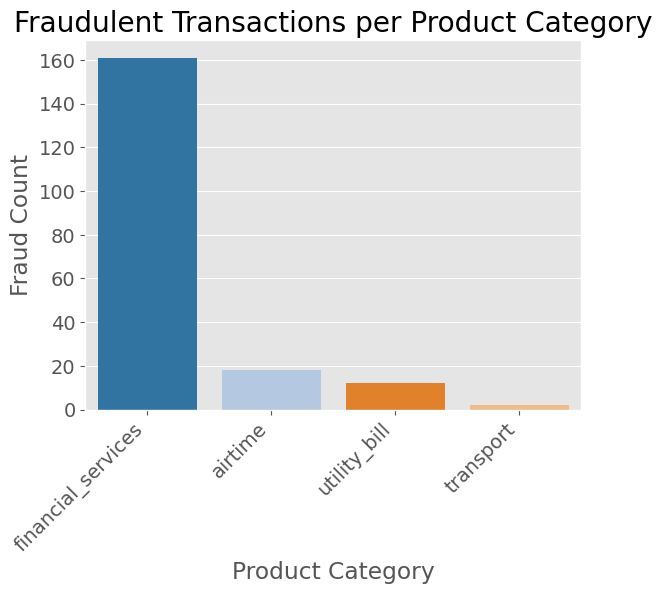

In [44]:
# to specify size of the plot, keep it defaukt for now plt.figure()

sns.countplot(x='ProductCategory',data=df[df["FraudResult"] == 1], palette=("tab20"))
plt.xticks(rotation=45, ha="right")
plt.xlabel("Product Category")
plt.ylabel("Fraud Count")
plt.title("Fraudulent Transactions per Product Category")

plt.show()

#### Product ID

In [27]:
df.query('FraudResult == 1').value_counts(['ProductId']).head(10)

ProductId   
ProductId_15    157
ProductId_3      12
ProductId_10      6
ProductId_13      6
ProductId_21      4
ProductId_9       3
ProductId_22      2
ProductId_5       2
ProductId_6       1
Name: count, dtype: int64

In [28]:
import re
df['ProductId'] = df['ProductId'].str.replace(r'\D', '', regex=True).astype(np.int64)

In [29]:
df['ProductId'].unique()


array([10,  6,  1, 21,  3, 15, 11, 19,  4,  5, 20,  9, 24, 14,  2, 13, 22,
        8,  7, 27, 12, 16, 23])

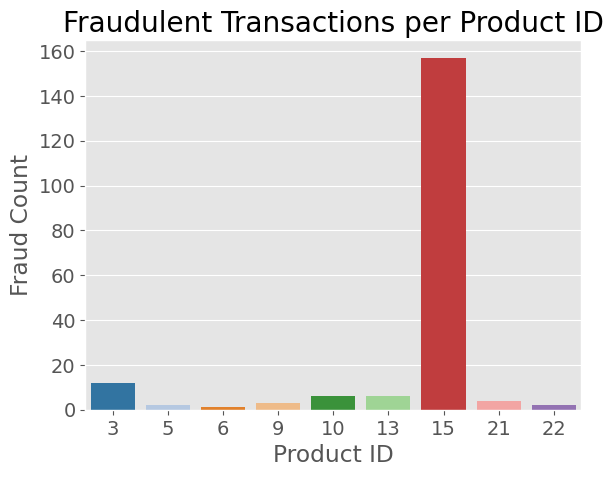

In [46]:
sns.countplot(x='ProductId',data=df[df["FraudResult"] == 1], palette='tab20')
plt.xlabel("Product ID")
plt.ylabel("Fraud Count")
plt.title("Fraudulent Transactions per Product ID")

plt.show()

#### Provider ID

In [33]:
df.query('FraudResult == 1').value_counts(['ProviderId']).head(10)

ProviderId  
ProviderId_3    64
ProviderId_5    64
ProviderId_1    57
ProviderId_4     5
ProviderId_6     3
Name: count, dtype: int64

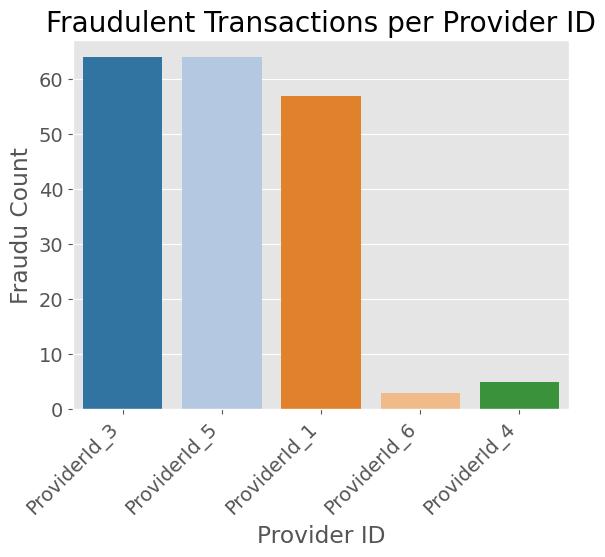

In [ ]:
plt.figure()

sns.countplot(x='ProviderId',data=df[df["FraudResult"] == 1], palette='tab20')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Provider ID")
plt.ylabel("Fraud Count")
plt.title("Fraudulent Transactions per Provider ID")

plt.show()

#### Channel ID

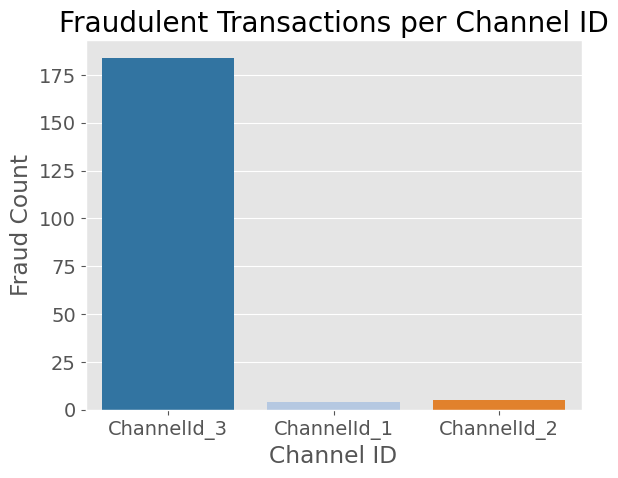

In [ ]:
sns.countplot(x='ChannelId',data=df[df["FraudResult"] == 1], palette='tab20')

plt.xlabel("Channel ID")
plt.ylabel("Fraud Count")
plt.title("Fraudulent Transactions per Channel ID")

plt.show()

#### Pricing Strategy

In [36]:
df.query('FraudResult == 1').groupby('PricingStrategy')['PricingStrategy'].count()

PricingStrategy
0     36
1      7
2    139
4     11
Name: PricingStrategy, dtype: int64

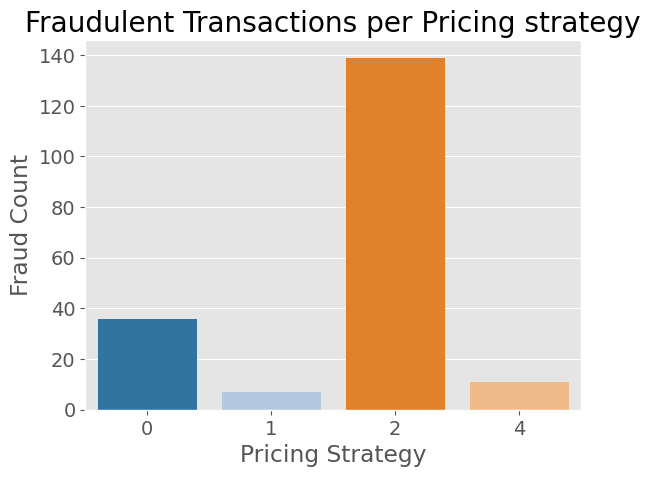

In [49]:
sns.countplot(x='PricingStrategy',data=df[df["FraudResult"] == 1], palette='tab20')
plt.xlabel("Pricing Strategy")
plt.ylabel("Fraud Count")
plt.title("Fraudulent Transactions per Pricing strategy")

plt.show()

#### Weekday

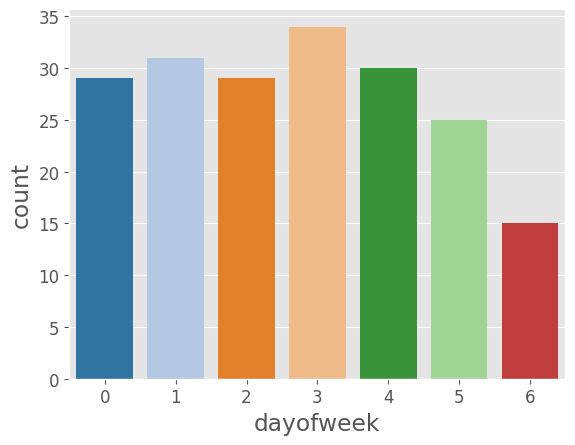

In [50]:
sns.countplot(x='dayofweek',data=df[df["FraudResult"] == 1], palette='tab20')

plt.yticks(size=12)
plt.xticks(size=12)
plt.show()